In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from uco.model.loss import LabelSmoother

In [2]:
targets = torch.tensor([
    [0],
    [1]
])
targets

tensor([[0],
        [1]])

In [3]:
outputs = torch.tensor(np.linspace(0, 1, num=100))
outputs

tensor([0.0000, 0.0101, 0.0202, 0.0303, 0.0404, 0.0505, 0.0606, 0.0707, 0.0808,
        0.0909, 0.1010, 0.1111, 0.1212, 0.1313, 0.1414, 0.1515, 0.1616, 0.1717,
        0.1818, 0.1919, 0.2020, 0.2121, 0.2222, 0.2323, 0.2424, 0.2525, 0.2626,
        0.2727, 0.2828, 0.2929, 0.3030, 0.3131, 0.3232, 0.3333, 0.3434, 0.3535,
        0.3636, 0.3737, 0.3838, 0.3939, 0.4040, 0.4141, 0.4242, 0.4343, 0.4444,
        0.4545, 0.4646, 0.4747, 0.4848, 0.4949, 0.5051, 0.5152, 0.5253, 0.5354,
        0.5455, 0.5556, 0.5657, 0.5758, 0.5859, 0.5960, 0.6061, 0.6162, 0.6263,
        0.6364, 0.6465, 0.6566, 0.6667, 0.6768, 0.6869, 0.6970, 0.7071, 0.7172,
        0.7273, 0.7374, 0.7475, 0.7576, 0.7677, 0.7778, 0.7879, 0.7980, 0.8081,
        0.8182, 0.8283, 0.8384, 0.8485, 0.8586, 0.8687, 0.8788, 0.8889, 0.8990,
        0.9091, 0.9192, 0.9293, 0.9394, 0.9495, 0.9596, 0.9697, 0.9798, 0.9899,
        1.0000], dtype=torch.float64)

In [39]:
df = pd.DataFrame({'output': [o for o in outputs]})
df['target'] = 1.0
df.target = df.target.apply(lambda t: torch.tensor(t).double())
df.head()

,output,target
0,"tensor(0., dtype=torch.float64)","tensor(1., dtype=torch.float64)"
1,"tensor(0.0101, dtype=torch.float64)","tensor(1., dtype=torch.float64)"
2,"tensor(0.0202, dtype=torch.float64)","tensor(1., dtype=torch.float64)"
3,"tensor(0.0303, dtype=torch.float64)","tensor(1., dtype=torch.float64)"
4,"tensor(0.0404, dtype=torch.float64)","tensor(1., dtype=torch.float64)"


In [40]:
def smooth_bce(output, target, smooth):
    if smooth == 0:
        return nn.BCELoss()(output, target).item()
    smoother = LabelSmoother(eps=smooth)
    return nn.BCELoss()(output, smoother(target)).item()

In [41]:
for smooth in [0, 1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]:
    df[f'smooth-{smooth}'] = df.apply(lambda row: smooth_bce(row.output, row.target, smooth), axis=1)
df.output = df.output.apply(lambda t: t.item())

In [42]:
df.head(20)

,output,target,smooth-0,smooth-0.1,smooth-0.01,smooth-0.001,smooth-0.0001,smooth-1e-05,smooth-1e-06
0,0.000000,"tensor(1., dtype=torch.float64)",27.631021,24.867919,27.354711,27.603390,27.628258,27.630745,27.630993
1,0.010101,"tensor(1., dtype=torch.float64)",4.595120,4.136623,4.549270,4.590535,4.594661,4.595074,4.595115
2,0.020202,"tensor(1., dtype=torch.float64)",3.901973,3.513816,3.863157,3.898091,3.901585,3.901934,3.901969
3,0.030303,"tensor(1., dtype=torch.float64)",3.496508,3.149934,3.461850,3.493042,3.496161,3.496473,3.496504
4,0.040404,"tensor(1., dtype=torch.float64)",3.208825,2.892067,3.177150,3.205658,3.208509,3.208794,3.208822
5,0.050505,"tensor(1., dtype=torch.float64)",2.985682,2.692296,2.956343,2.982748,2.985389,2.985653,2.985679
6,0.060606,"tensor(1., dtype=torch.float64)",2.803360,2.529276,2.775952,2.800620,2.803086,2.803333,2.803358
7,0.070707,"tensor(1., dtype=torch.float64)",2.649210,2.391622,2.623451,2.646634,2.648952,2.649184,2.649207
8,0.080808,"tensor(1., dtype=torch.float64)",2.515678,2.272537,2.491364,2.513247,2.515435,2.515654,2.515676
9,0.090909,"tensor(1., dtype=torch.float64)",2.397895,2.167637,2.374869,2.395593,2.397665,2.397872,2.397893


In [43]:
df.tail(20)

,output,target,smooth-0,smooth-0.1,smooth-0.01,smooth-0.001,smooth-0.0001,smooth-1e-05,smooth-1e-06
80,0.808081,"tensor(1., dtype=torch.float64)",0.213093,0.356852,0.227469,0.214531,0.213237,0.213108,0.213095
81,0.818182,"tensor(1., dtype=torch.float64)",0.200671,0.351078,0.215711,0.202175,0.200821,0.200686,0.200672
82,0.828283,"tensor(1., dtype=torch.float64)",0.188401,0.345751,0.204136,0.189974,0.188558,0.188416,0.188402
83,0.838384,"tensor(1., dtype=torch.float64)",0.176279,0.340904,0.192742,0.177925,0.176444,0.176296,0.176281
84,0.848485,"tensor(1., dtype=torch.float64)",0.164303,0.336580,0.181531,0.166026,0.164475,0.164320,0.164305
85,0.858586,"tensor(1., dtype=torch.float64)",0.152469,0.332828,0.170505,0.154272,0.152649,0.152487,0.152470
86,0.868687,"tensor(1., dtype=torch.float64)",0.140773,0.329712,0.159667,0.142662,0.140961,0.140791,0.140774
87,0.878788,"tensor(1., dtype=torch.float64)",0.129212,0.327312,0.149022,0.131193,0.129410,0.129232,0.129214
88,0.888889,"tensor(1., dtype=torch.float64)",0.117783,0.325727,0.138577,0.119862,0.117991,0.117804,0.117785
89,0.898990,"tensor(1., dtype=torch.float64)",0.106483,0.325089,0.128344,0.108670,0.106702,0.106505,0.106486


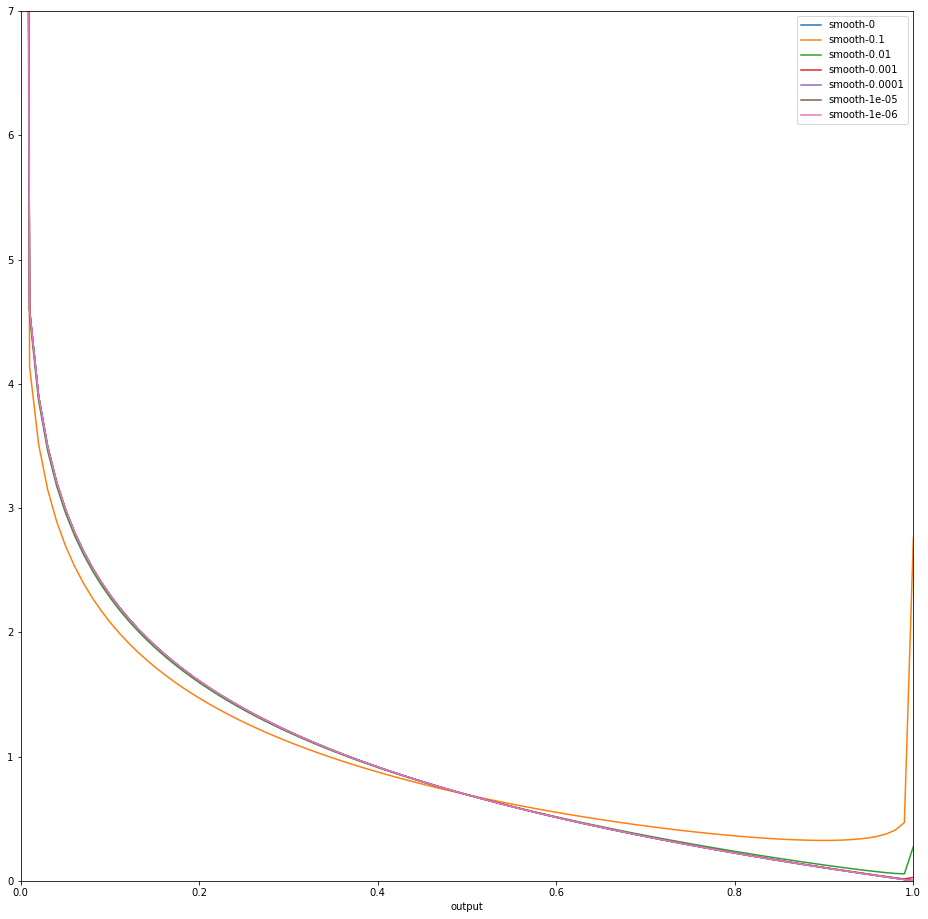

In [44]:
fig, ax = plt.subplots(figsize=(16, 16))

for smooth_col in df.columns[2:]:
    df.plot(kind='line', x='output', y=smooth_col, ax=ax)

ax.set_ylim((0, 7))
plt.show()